<a href="https://colab.research.google.com/github/rmgithub123/be_class/blob/main/EDA2_diabetes_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Display the first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Compute basic statistics
summary_statistics = df.describe()
summary_statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


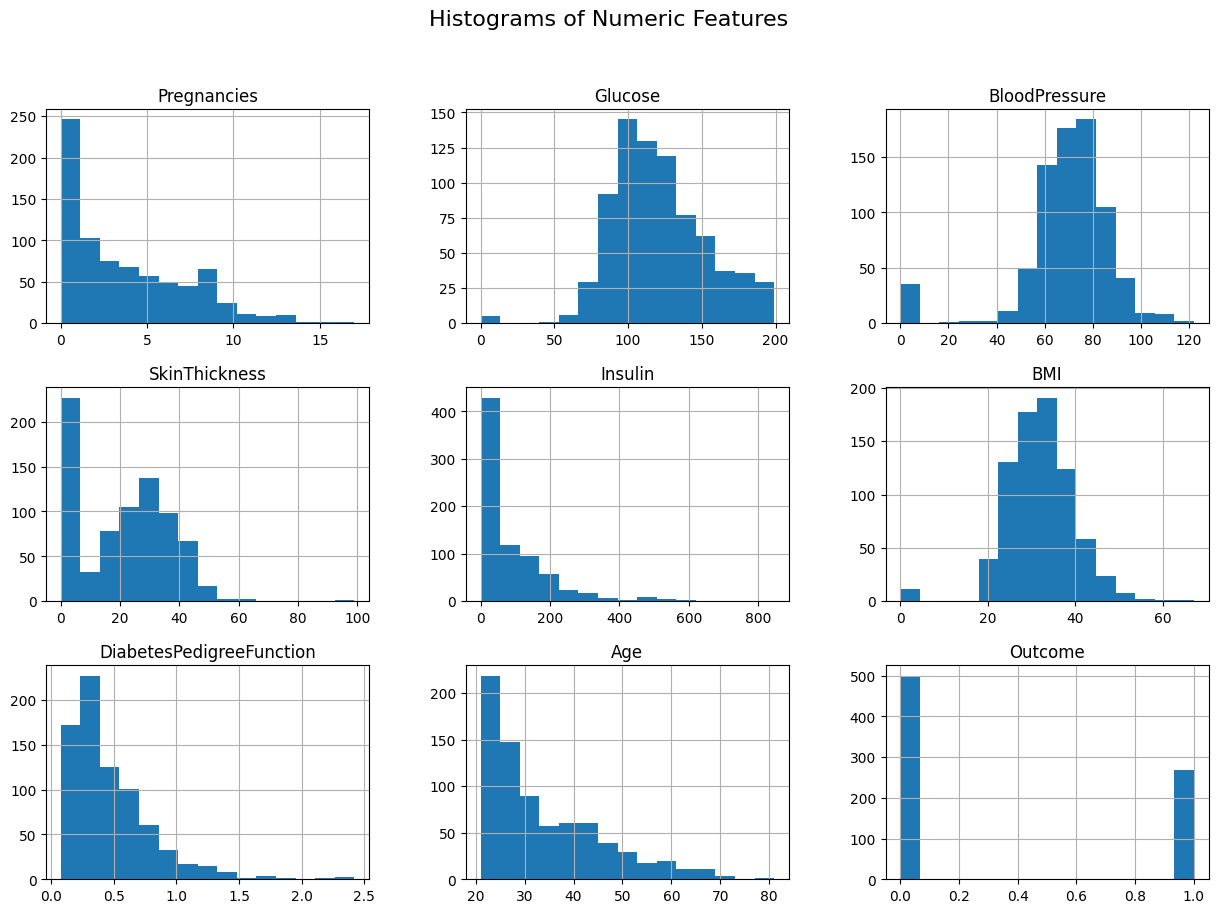

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical feature
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Numeric Features", size=16)
plt.show()

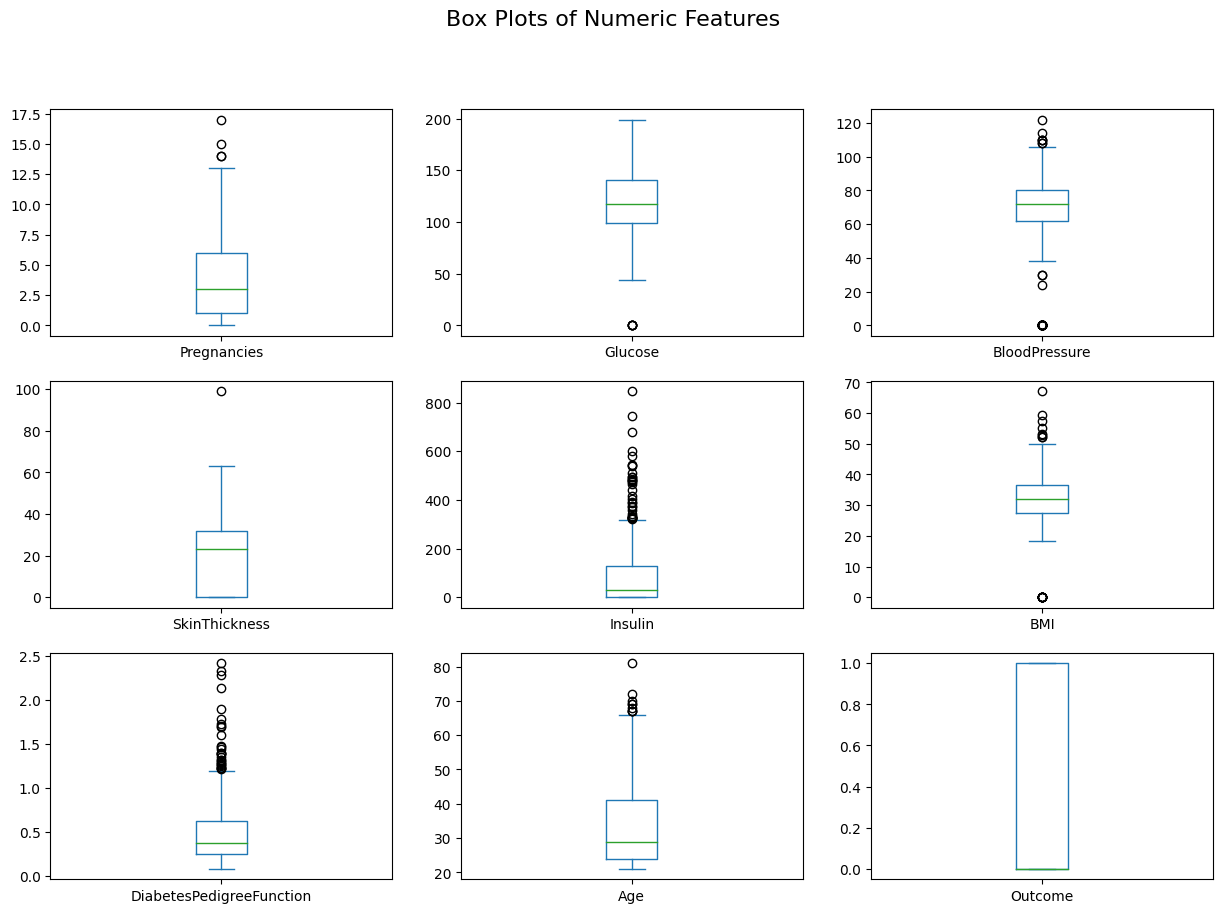

In [ ]:
# Plot boxplots for each numerical feature
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle("Box Plots of Numeric Features", size=16)
plt.show()

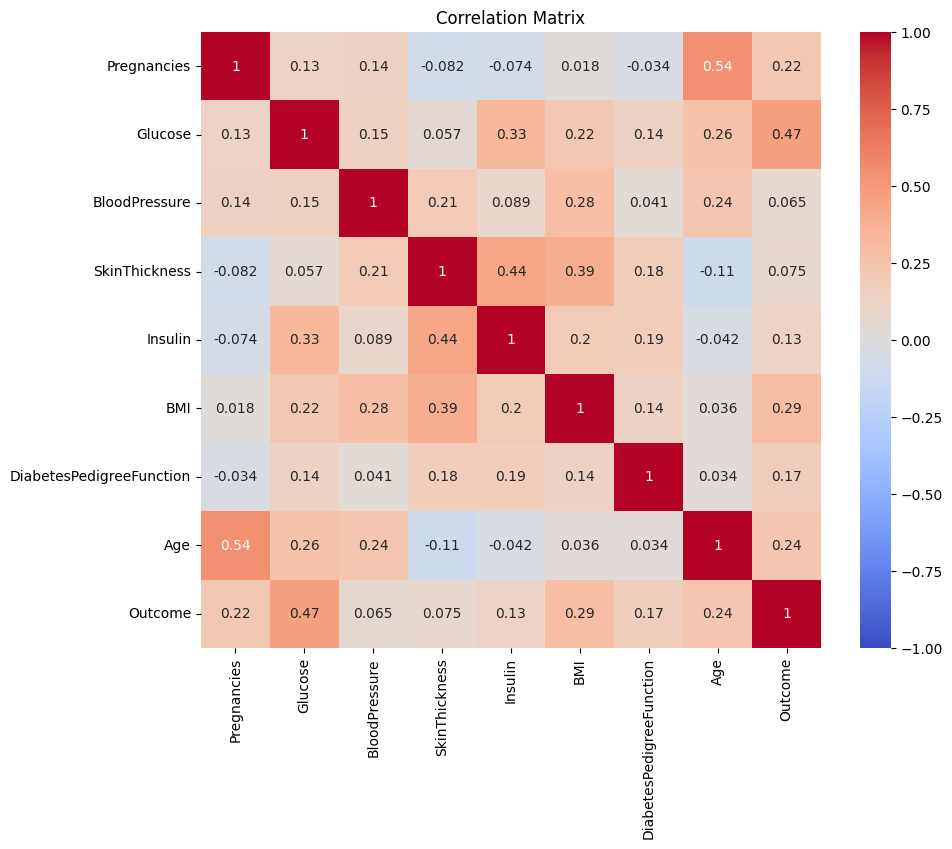

In [ ]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

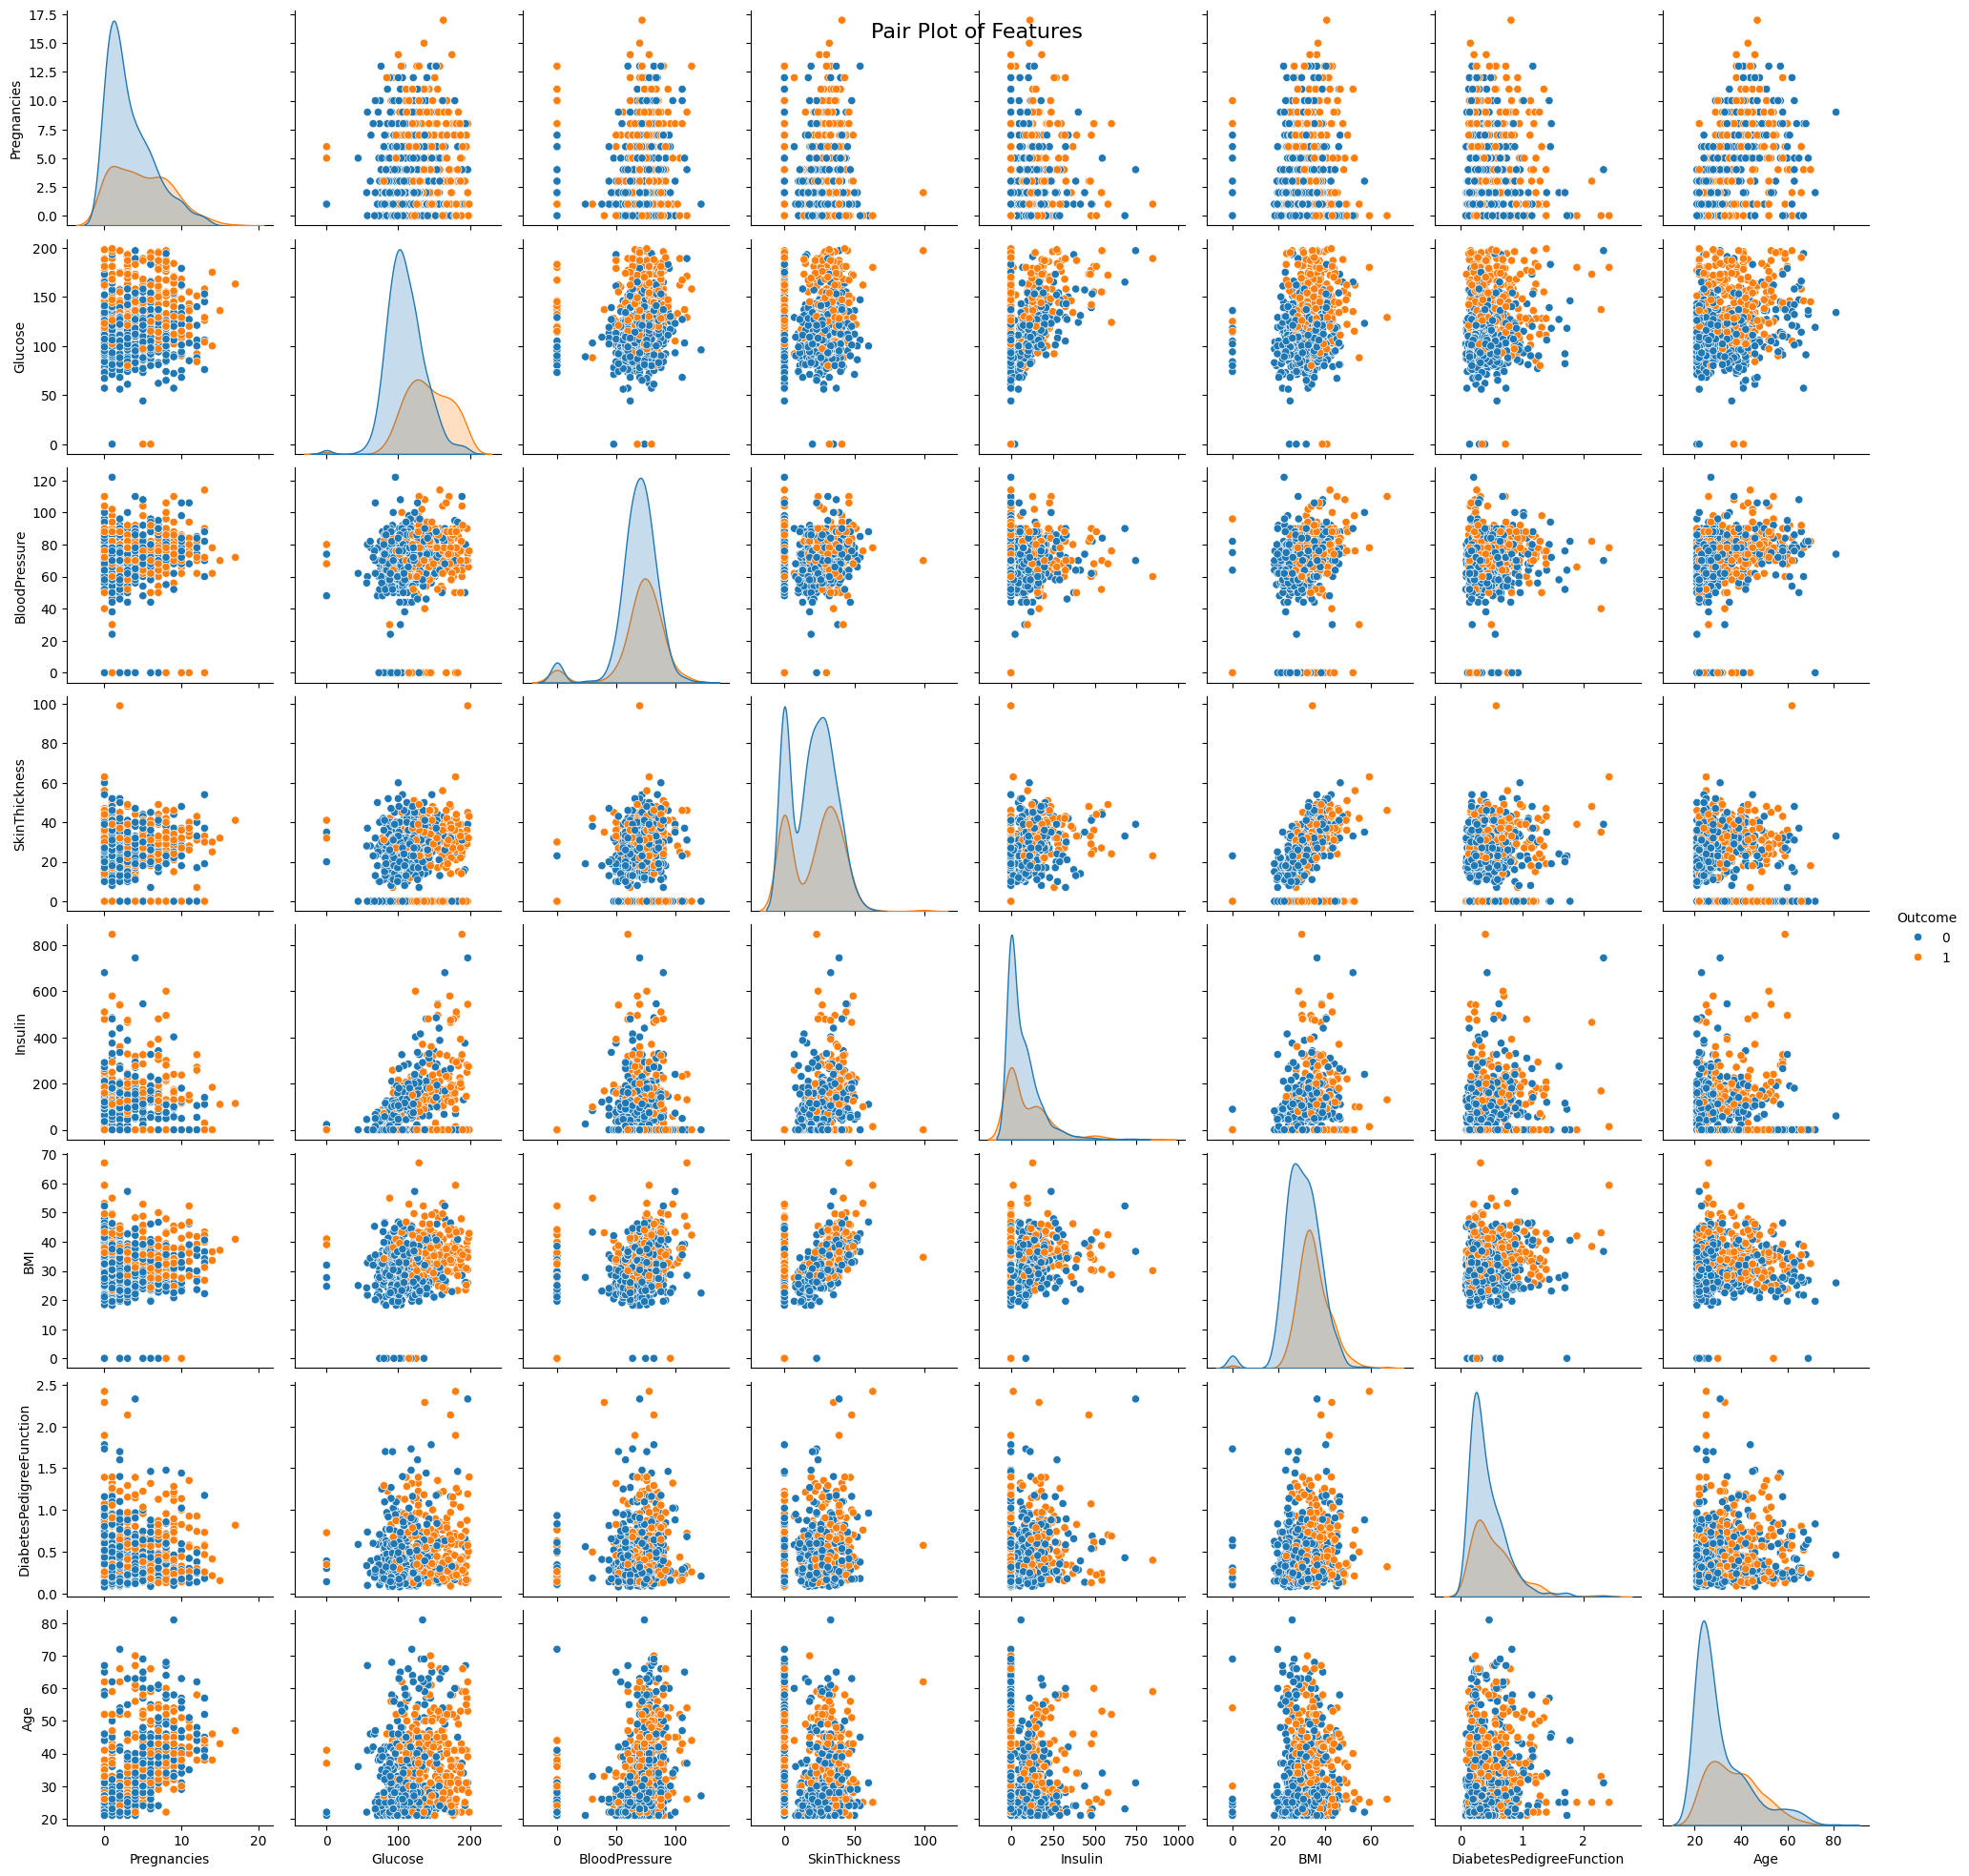

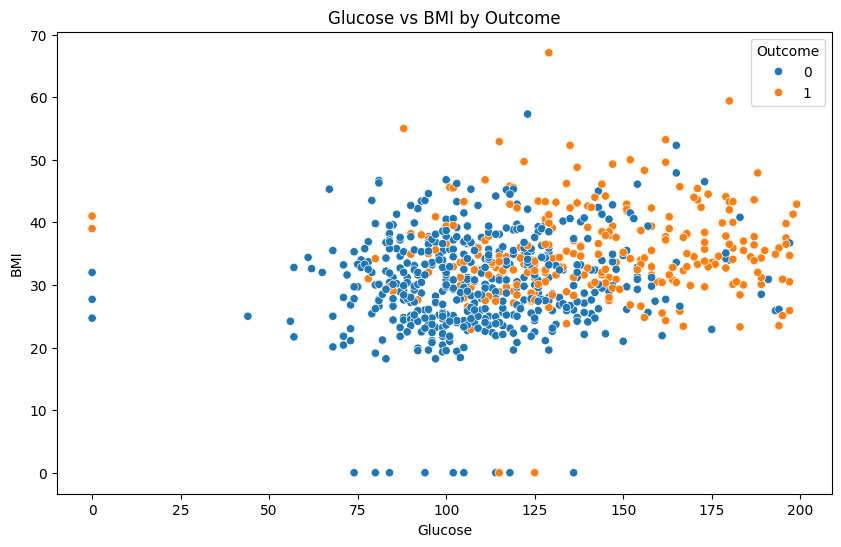

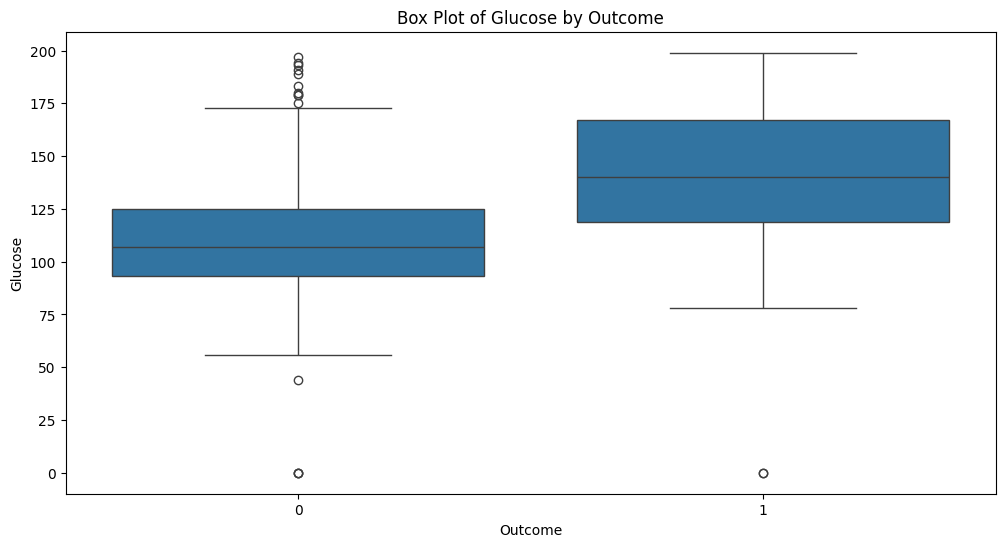

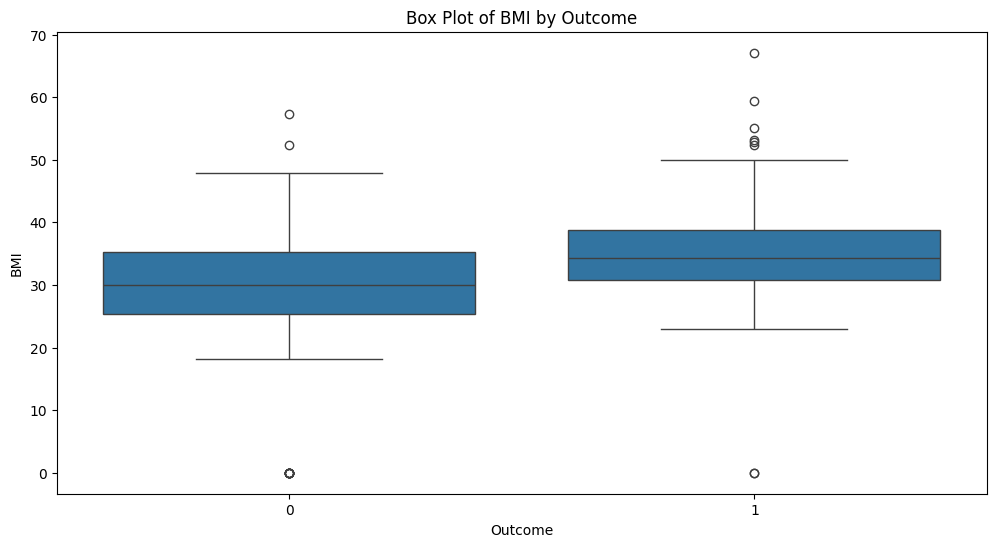

In [ ]:
# Pair plot to visualize relationships
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle("Pair Plot of Features", size=16)
plt.show()

# Scatter plot for a few selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome')
plt.title('Glucose vs BMI by Outcome')
plt.show()

# Box plot to visualize the distribution of key features by Outcome
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title('Box Plot of Glucose by Outcome')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Outcome', y='BMI')
plt.title('Box Plot of BMI by Outcome')
plt.show()

In [ ]:
# Example: Creating an interaction feature
df['Glucose_BMI'] = df['Glucose'] * df['BMI']

# Binning Age into categories
df['Age_Bin'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Log Transformation of skewed features
df['Insulin_Log'] = np.log1p(df['Insulin'])

# Display the first few rows to check the new features
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_BMI Age_Bin  Insulin_Log  
0                     0.627   50        1       4972.8   40-50     0.000000  
1                     0.351   31        0       2261.0   30-40     0.000000  
2                     0.672   32        1       4263.9   30-40     0.000000  
3                     0.167   21        0       2500.9   20-30     4.553877  
4                     2.288   33        1       5904.7   30-40     5.129899  


1. Advanced Visualization Methods

Heatmaps for Feature Interactions